# Sentiment and Emotion Analysis

## Overview

Sentiment analysis is the task of determining the emotional value of a given expression in natural language. In this project we explored the Polarity and Subjectivity of the texts using rule based models including TextBlob and Vedar. We settled on TextBlob since it is simple and has the ability to perform subjectivity analysis.

Polarity analysis determins whether a word, phrase, or document is positive, negative, or neutral. The scores ranges from -1 as very negative to +1 as very posivite with 0 being neutral. The subjectivity score varies from 0 as objective texts to 1 being more subjected texts. The higly subjective texts are not facts but hingly influenced by the writers feelings and emotions.

We invetigated and detected Text Emotion using Hugging Face Model Hub's EmoRoberta. EmoRoberta leverages Roberta to perform Emotion classification into 28 categories of Emotion. We also explored the NRC Lexicon model which gives the fraction for all 8 emotions to the text.

This notebook will include the following sections:

- Libraries and data importation.
- Data cleaning.
- Sentiment analysis.
- EDA
- Emotional analysis
- Emotion Visualization

##1. Import Libraries

In [ ]:
#Importing required libraries
import pandas as pd ## data manipulation
import numpy as np ## numerical processing
import re ## regular expressions
import seaborn as sns ## Plotting
from wordcloud import wordcloud ## wordcloud plotting
import matplotlib.pyplot as plt ## word cloud plotting
plt.style.use('fivethirtyeight') ## plotting background

In [ ]:
#!pip install transformers -q  ## For the Hugging Face Model pipeline

In [ ]:
#!pip install nrclex ## For the NRC Lexicon model

In [ ]:
#!python -m textblob.download_corpora #downloding TextBlob

In [ ]:
#Importing required libraries
from textblob import TextBlob ## sentiment analysis polarity & subjectivity
from transformers import pipeline ## Download transformer models from hugging face
from nrclex import NRCLex ## lexicon based sentiment analysis

## 2. Import Data

Data harvested from twitter API will be utilized to fit the sentiment and emotion analysis models. The data is based on trending tweets in Kenya.

In [ ]:
## Mount drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## Read in data from drive
twitter_data1 = pd.read_csv('/content/drive/MyDrive/Location Trend Tweets 2022-03-31.csv')
twitter_data2 = pd.read_csv('/content/drive/MyDrive/Location Trend Tweets 2022-04-01.csv')
twitter_data3 = pd.read_csv('/content/drive/MyDrive/Location Trend Tweets 2022-04-02.csv')
twitter_data4 = pd.read_csv('/content/drive/MyDrive/Location Trend Tweets 2022-04-03.csv')
twitter_data5 = pd.read_csv('/content/drive/MyDrive/Location Trend Tweets 2022-04-04.csv')
twitter_data6 = pd.read_csv('/content/drive/MyDrive/Location Trend Tweets 2022-04-05.csv')

twitter_data = pd.concat([twitter_data6, twitter_data5,twitter_data4,twitter_data3,twitter_data2,twitter_data1])
twitter_data.head()


,screen_name,hashtag,tweet,time_stamp
0,alfredobore7,#FuelShortage,RT @DailyMonitor: Kenya's fuel crisis in pictu...,2022-04-05 06:08:30+00:00
1,jemutaiketer,#FuelShortage,RT @MacOtani: Video of the day! 😎 #FuelShortag...,2022-04-05 06:08:28+00:00
2,MariaGenerous,#FuelShortage,RT @abuyamasta: Pale mesh unaweza promote busi...,2022-04-05 06:08:26+00:00
3,urdrivetech,#FuelShortage,RT @MacOtani: Video of the day! 😎 #FuelShortag...,2022-04-05 06:08:23+00:00
4,twittistor,#FuelShortage,RT @WilliamsMkenya: Who owns RUBiS Energy? Jus...,2022-04-05 06:08:22+00:00


In [ ]:
## View data shape
twitter_data.shape

(13085, 4)

In [ ]:
#Desplaying a few text for visual inspection
for i,tweet in enumerate(twitter_data['tweet'].head(10)):
    print(i+1, tweet, '\n')

1 RT @DailyMonitor: Kenya's fuel crisis in pictures
#FuelShortage
#MonitorUpdates via @NationAfrica https://t.co/6MiDh4PoUs 

2 RT @MacOtani: Video of the day! 😎 #FuelShortage https://t.co/3i03uW0Blq 

3 RT @abuyamasta: Pale mesh unaweza promote business yako by selling online via https://t.co/AQIYjYkazH ama kupromote business ya another you… 

4 RT @MacOtani: Video of the day! 😎 #FuelShortage https://t.co/3i03uW0Blq 

5 RT @WilliamsMkenya: Who owns RUBiS Energy? Just asking as a concerned patriotic citizen of this nation on behalf of all HUSTLERS. 

#FuelSh… 

6 RT @WilliamMutama: @WilliamsRuto What agenda are you left with now:
1.BBI issue closed
2.Fertilizer done
3.Fuel crisis solved 
Sh34.44b to… 

7 RT @Guevara_KE: With all the crises we're facing as a country, sometimes you just have to smile courtesy of my Country people.. Kenyans are… 

8 RT @MacOtani: Video of the day! 😎 #FuelShortage https://t.co/3i03uW0Blq 

9 RT @RobisearchLtd: Today’s customers are always on the move &amp;

##3. Data Cleaning

From the desplayed dataframe of the tweeter data, a number of tweets seen to be repeated potentially from retweets. However, we will include them in our predictions since they have been sent by different people hence considered as different opinions.  We will first state our cleaning by removing @mentions, hyperlinks, new lines and everthing except letters and numbers.

In [ ]:
## clean text
def text_cleaner (text):

  """ Function to clean text data. 

  Parameters
  ----------
  text : A string
    
  Returns
  -------
  text : Cleaned string.
    
  """
  text = re.sub(r'@[A-Za-z0-9]+','',str(text)) ## remove @ mentions
  text = re.sub(r'#','',str(text)) ## remove # symbol
  text = re.sub(r'^RT+','',str(text)) ## remove RT
  text = re.sub(r'https?:\/\/\S+','',str(text)) ## remove hyperlink
  text = re.sub(r'[^\w\s]','',str(text)) ## remove everything apart from words and space
  text = re.sub(r'_',' ',str(text)) ## remove underscore
  text = re.sub(r'\n',' ',str(text)) ## remove \n

  return text


In [ ]:
## Create clean text column

twitter_data['cleaned_tweet'] = twitter_data['tweet'].apply(text_cleaner)
twitter_data = twitter_data[['screen_name','hashtag','tweet','cleaned_tweet','time_stamp']]

#Desplaying a few text for visual inspection
for i,tweet in enumerate(twitter_data['cleaned_tweet'].head(10)):
    print(i+1, tweet, '\n')

1   Kenyas fuel crisis in pictures FuelShortage MonitorUpdates via   

2   Video of the day  FuelShortage  

3   Pale mesh unaweza promote business yako by selling online via  ama kupromote business ya another you 

4   Video of the day  FuelShortage  

5   Who owns RUBiS Energy Just asking as a concerned patriotic citizen of this nation on behalf of all HUSTLERS   FuelSh 

6    What agenda are you left with now 1BBI issue closed 2Fertilizer done 3Fuel crisis solved  Sh3444b to 

7   KE With all the crises were facing as a country sometimes you just have to smile courtesy of my Country people Kenyans are 

8   Video of the day  FuelShortage  

9   Todays customers are always on the move amp need fast reliable information from businesseservices they interact withIn 

10   Video of the day  FuelShortage  



## 4. Sentiment Analysis

We will utilize the python TextBlob library for sentiment analysis. 
TextBlob is a Lexicon-based sentiment analyzer It has some predefined rules or we can say word and weight dictionary, where it has some scores that help to calculate a sentence's polarity and subjectivity.

###4.1 Get Text Polarity

Determining whether a word, phrase, or document is positive, negative, or neutral, ranging from -1 score as very negative to +1 as very posivite with 0 being neutral. 

In [ ]:
## Polarity fxn

def get_polarity (text):
  """ Function to get the polarity score. 

  Parameters
  ----------
  text : A string
    
  Returns
  -------
  float : polarity score.
    
  """

  return TextBlob(text).sentiment.polarity

###4.2 Get Text Subjectivity

Subjectivity quantifies the amount of personal opinion and factual information contained in the text. Higher subjectivity means that the text contains personal opinion rather than factual information. The subjectivity varies from 0 as objective texts to 1 being more subjected texts.

In [ ]:
## subjectivity fxn

def get_subjectivity (text):
  """ Function to get the subjectivity score. 

  Parameters
  ----------
  text : A string
    
  Returns
  -------
  float : subjectivity score.
    
  """

  return TextBlob(text).sentiment.subjectivity

In [ ]:
## Create subjectivity and polarity columns

twitter_data['subjectivity'] = twitter_data['cleaned_tweet'].apply(get_subjectivity)

twitter_data['polarity'] = twitter_data['cleaned_tweet'].apply(get_polarity)


In [ ]:
## getting the data information
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13085 entries, 0 to 2498
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   screen_name    13085 non-null  object 
 1   hashtag        13085 non-null  object 
 2   tweet          13084 non-null  object 
 3   cleaned_tweet  13085 non-null  object 
 4   time_stamp     13083 non-null  object 
 5   subjectivity   13085 non-null  float64
 6   polarity       13085 non-null  float64
dtypes: float64(2), object(5)
memory usage: 817.8+ KB


## 5. EDA

The polarity score had a mean of 0.117077, with the median at 0. The positive class had 5222 texts, neutral class had 5989 while the negative class had 1874.

In [ ]:
## Filter for necessary columns
clean_data = twitter_data[['cleaned_tweet','subjectivity','polarity']]
clean_data['sentiment_class'] = np.where(clean_data['polarity'] > 0, 'positive', 
         (np.where(clean_data['polarity'] < 0, 'negative', 'neutral')))
                                        
clean_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,cleaned_tweet,subjectivity,polarity,sentiment_class
0,Kenyas fuel crisis in pictures FuelShortage ...,0.00,0.00,neutral
1,Video of the day FuelShortage,0.00,0.00,neutral
2,Pale mesh unaweza promote business yako by s...,0.18,-0.21,negative
3,Video of the day FuelShortage,0.00,0.00,neutral
4,Who owns RUBiS Energy Just asking as a conce...,0.00,0.00,neutral


In [ ]:
## Distribution of polarity and subjectivity

clean_data[['subjectivity','polarity']].describe()


,subjectivity,polarity
count,13085.000000,13085.000000
mean,0.319256,0.100133
std,0.318272,0.278174
min,0.000000,-1.000000
25%,0.000000,0.000000
50%,0.300000,0.000000
75%,0.540000,0.200000
max,1.000000,1.000000


In [ ]:
## getting the value counts for the sentiment class

clean_data['sentiment_class'].value_counts()


neutral     5989
positive    5222
negative    1874
Name: sentiment_class, dtype: int64

In [ ]:
## getting the normalize value counts for the sentiment class

clean_data['sentiment_class'].value_counts(normalize=True)


neutral     0.457700
positive    0.399083
negative    0.143217
Name: sentiment_class, dtype: float64

When Exploring the text to see if the negative sentiments were correctly classifed, suprisingly, some positive texts like the 1 and neural texts like 3 are classifed as negative. Text like the 20 is very dificult to really classify it correctly since it contains both positive and negative parts. For the positively classified sentiments, a great number of the texts seem to be correctly classifed. Some text seem to be incorrectly classified as neural.18 looks more like a negative sentiment.

We explored the stated misclassified with vader. Vader seem to correctly classify a misclassied texts respectively.

In [ ]:
# separating a set of the negative texts and displaying the text for visual inspection
df_negative = clean_data[clean_data['sentiment_class'] == 'negative'].sample(n=5, random_state = 123)

#desplaying
for i,tweet in enumerate(df_negative['cleaned_tweet']):
    print(i+1, tweet, '\n')


1   I bought a big bag of the real CrowCoin guys  Babycheems Dev so 100 SAFU all other Crowcoins are fake and imitations M 

2   deno Azimio la Umoja alias Luos are very stupid Hawakumbuki Jacaranda na Kondele and do they think Ruto and Kositany plus  entir 

3 Am crossing my fingers really hard to see Edwinas wedding to Anthonys not happen in episode 6 We all know who he  

4       Pedri FAKE SHOT 

5  FIFA World Cup We demand that the Algeria Cameroon match  be replayed due to arbitration error  



In [ ]:
# Exploring the posive statements

df_positive = clean_data[clean_data['sentiment_class'] == 'positive'].sample(n=5, random_state = 42)

for i,tweet in enumerate(df_positive['cleaned_tweet']):
    print(i+1, tweet, '\n')


1   unflop new acc mau cari moots all fandom reading acc or writing acc terserah help rt like juseyoo 

2   Diogo Jota  Its the first time in my career that I reach 20 so just keep on going because we still have plenty to pla 

3    This Crystal Palace super team really trashed Arsenal Spurs and Manchester City 

4   When DP Ruto team was attacked in Kibera Uhuru said its ok for politicians to be stonedWhen DP was attacked in KenolampEmb 

5  I think  Everton will avoid the drop Not because of their own form but because the teams  



In [ ]:
# Exploring the posive statements

df_neutral = clean_data[clean_data['sentiment_class'] == 'neutral'].sample(n=5, random_state = 42)

for i,tweet in enumerate(df_neutral['cleaned_tweet']):
    print(i+1, tweet, '\n')


1 You can substitute water for highcalorie sugary drinks for example and switch from fullfat to lowfat dairy pr  

2 Why Cristiano Ronaldo isnt in the Manchester United team vs Leicester City  

3   Mr President is Deputy President a child of a lesser GodIs Raila  Odinga trigger for violence in Kenya wh 

4 4 No civil proceedings can be instituted against the president  5 No obligation on IEBC to ensure compliance wit  

5   Governor Mandago disputes claims that he organized Iten attack that led to the damaging of Raila Odingas chopper in Uasin Gi 



###5.1 Sentiment Analysis Visualization.

####5.1.1 subjectivity Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


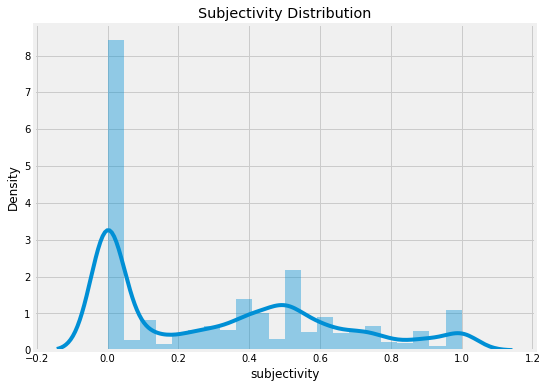

In [ ]:
#subjectivity distribution
plt.figure(figsize=(8,6))
plt.title('Subjectivity Distribution')
sns.distplot(clean_data['subjectivity'])
plt.show()


The plot has 3 peaks. First at 0, then around 0.5 and finaly a small peak at 1.

####5.1.2 Polarity Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


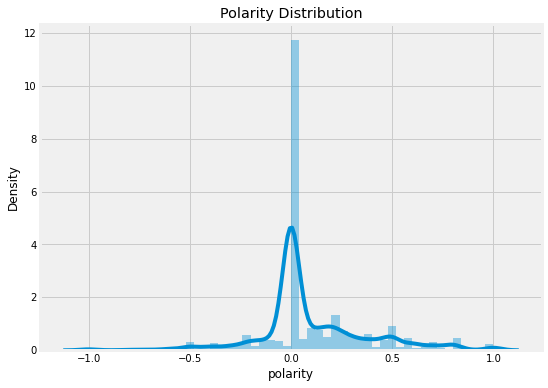

In [ ]:
#polarity distribution
plt.figure(figsize=(8,6))
plt.title('Polarity Distribution')
sns.distplot(clean_data['polarity'])
plt.show()


Polarity seems to be normaly distributed but with more tweets falling on the positive side.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


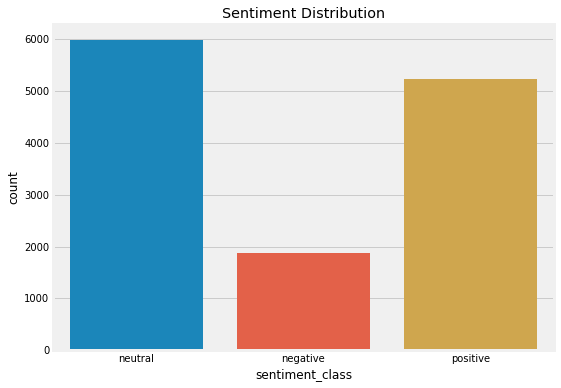

In [ ]:
## Sentiment distribution bar plot
plt.figure(figsize=(8,6))
plt.title('Sentiment Distribution')
sns.countplot(clean_data['sentiment_class'])
plt.show()

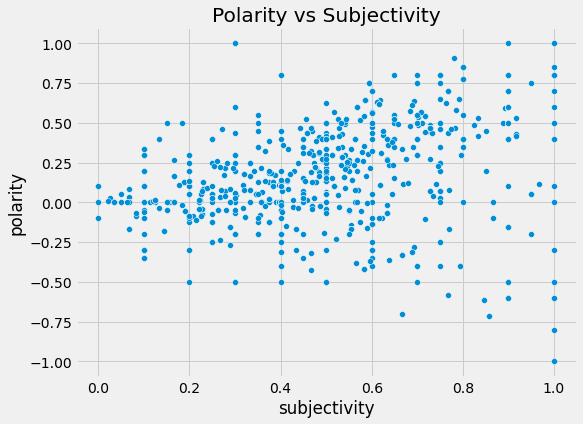

In [ ]:
## polarity and subjectivity
plt.figure(figsize=(8,6))
plt.title('Polarity vs Subjectivity')
sns.scatterplot(data= clean_data,x="subjectivity",y="polarity")
plt.show()

As expected polarity funnels out as subjectivity increases. This makes sense as the more subjective you write it the more it is expected you will express your emotions

###5.2 Wordclouds

Word clouds are graphical representations of word frequency that give greater prominence to words that appear more frequently in a source text. The larger the word in the visual the more common the word was in the document(s). 

#### 5.2.1 All Tweets WordCloud

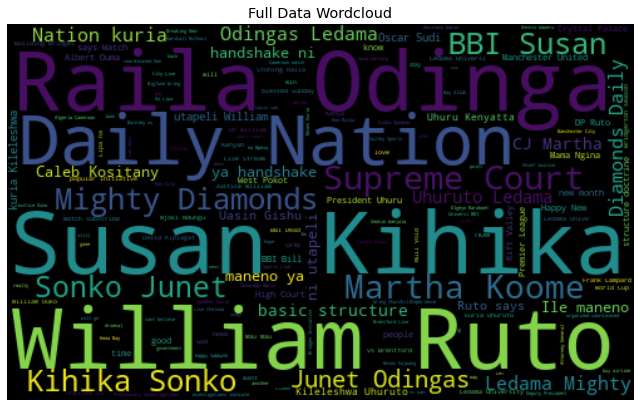

In [ ]:
## Whole Dataset
## Plot word cloud

all_words = ' '.join(twts for twts in clean_data['cleaned_tweet'])

text_cloud = wordcloud.WordCloud(height=300,width=500,random_state=10,max_font_size=110).generate(all_words) #background_color='white',

plt.figure(figsize=(10,8))
plt.title('Full Data Wordcloud')
plt.imshow(text_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()


#### 5.2.2 Positive Tweets WordCloud

The below wordcloud is for tweets with a polarity score greater than 0.

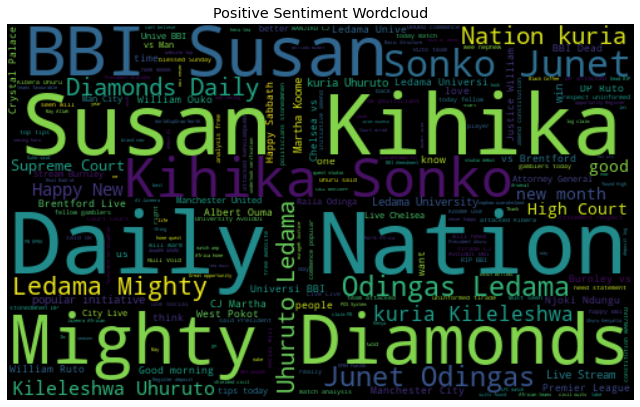

In [ ]:
## Positive polarity 
positive_data = clean_data[clean_data['sentiment_class']=='positive']
all_words = ' '.join(twts for twts in positive_data['cleaned_tweet'])

text_cloud = wordcloud.WordCloud(height=300,width=500,random_state=10,max_font_size=110).generate(all_words)

plt.figure(figsize=(10,8))
plt.title('Positive Sentiment Wordcloud')
plt.imshow(text_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

Salient words are politician names and constitutional reforms. We can infer their was positive sentiment on the supreme court of Kenya shooting down constitutional ammendment proposal. The building bridges ammendment (BBI) was a document proposing constitutional ammendments.

####5.2.3  Negative Tweets WordCloud

The below wordcloud is for tweets with a polarity score less than 0.

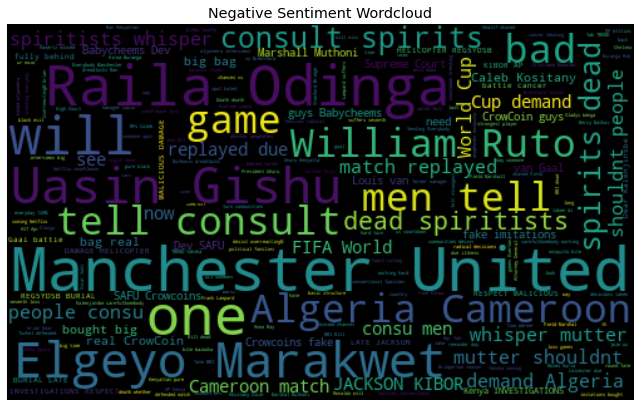

In [ ]:
## Negative polarity with
negative_data = clean_data[clean_data['sentiment_class']=='negative']
all_words = ' '.join(twts for twts in negative_data['cleaned_tweet'])

text_cloud = wordcloud.WordCloud(height=300,width=500,random_state=10,max_font_size=110).generate(all_words)

plt.figure(figsize=(10,8))
plt.title('Negative Sentiment Wordcloud')
plt.imshow(text_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

The negative theme seems to be about football clubs perfoming poorly on their leagues and national teams not qualifing for the world cup. There is also a theme on a vocal Kenyan politician who passed away recently from a county by the name Elgeyo Marakwet.

## 6. Emotion Analysis

Emotion analysis is the process of identifying and analyzing the underlying emotions expressed in textual data.

###6.1 Transformer Model - Hugging Face Model

W will use the EmoRoberta model from Hugging Face transformers API. EmoRoberta leverages Roberta to perform Emotion classification into 28 categories of Emotion. RoBERTa builds on BERT’s language masking strategy and modifies key hyperparameters in BERT, including removing BERT’s next-sentence pretraining objective, and training with much larger mini-batches and learning rates. RoBERTa was also trained on an order of magnitude more data than BERT, for a longer amount of time. This allows RoBERTa representations to generalize even better to downstream tasks compared to BERT.

In [ ]:
## Define task and model

emotion = pipeline('sentiment-analysis',model='arpanghoshal/EmoRoBERTa')

Downloading:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


Downloading:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/780k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [ ]:
## Test emotion fanction
clean_data['cleaned_tweet'][:10].apply(emotion)

0    [{'label': 'neutral', 'score': 0.9964290261268...
1    [{'label': 'neutral', 'score': 0.9978333115577...
2    [{'label': 'neutral', 'score': 0.9947920441627...
3    [{'label': 'neutral', 'score': 0.9978333115577...
4    [{'label': 'neutral', 'score': 0.9886881709098...
5    [{'label': 'curiosity', 'score': 0.66541373729...
6    [{'label': 'optimism', 'score': 0.627018868923...
7    [{'label': 'neutral', 'score': 0.9978333115577...
8    [{'label': 'neutral', 'score': 0.9552896022796...
9    [{'label': 'neutral', 'score': 0.9978333115577...
Name: cleaned_tweet, dtype: object

In [ ]:
## Define Emotion factions

def get_emotion_label (text):
  """ Function to get the emotion lables score. 

  Parameters
  ----------
  text : A string
    
  Returns
  -------
  string : emotion lable.
    
  """

  return (emotion(text)[0]['label'])


def get_emotion_score (text):
  """ Function to get the emotion score. 

  Parameters
  ----------
  text : A string
    
  Returns
  -------
  float : emotion score.
    
  """

  return (emotion(text)[0]['score'])


In [ ]:
#%%time
clean_data['emotion_label'] = clean_data['cleaned_tweet'].apply(get_emotion_label)
clean_data['emotion_score'] = clean_data['cleaned_tweet'].apply(get_emotion_score)
clean_data.head()

,hashtag,cleaned_tweet,date,subjectivity,polarity,sentiment_class,emotion_label,emotion_score
0,#FuelShortage,Kenyas fuel crisis in pictures FuelShortage ...,2022-04-05,0.00,0.00,neutral,neutral,0.996429
1,#FuelShortage,Video of the day FuelShortage,2022-04-05,0.00,0.00,neutral,neutral,0.997833
2,#FuelShortage,Pale mesh unaweza promote business yako by s...,2022-04-05,0.18,-0.21,negative,neutral,0.994792
3,#FuelShortage,Video of the day FuelShortage,2022-04-05,0.00,0.00,neutral,neutral,0.997833
4,#FuelShortage,Who owns RUBiS Energy Just asking as a conce...,2022-04-05,0.00,0.00,neutral,neutral,0.988688


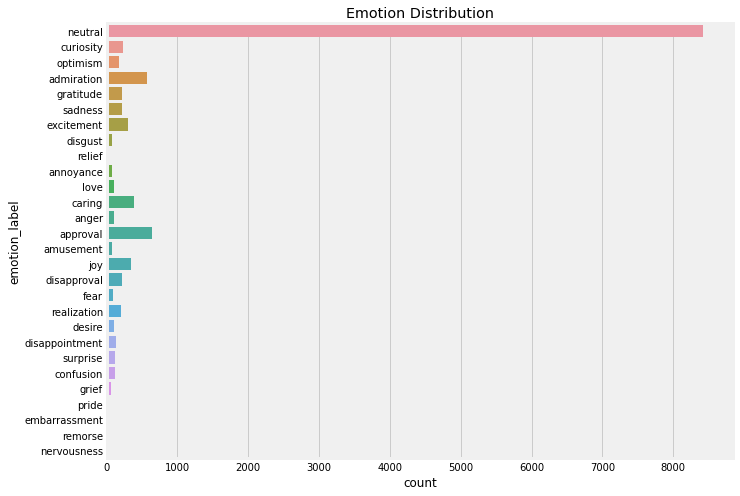

In [ ]:
## Distribution plot for the emotions
plt.figure(figsize=(10,8))
plt.title('Emotion Distribution')
sns.countplot(data=clean_data,y='emotion_label')
plt.show()

In [ ]:
## value counts for the emotion label

clean_data['emotion_label'].value_counts()

neutral           8422
approval           635
admiration         570
caring             388
joy                346
excitement         301
curiosity          232
sadness            224
disapproval        216
gratitude          216
realization        199
optimism           178
disappointment     130
confusion          124
surprise           122
desire             110
love               107
anger              101
fear                90
amusement           82
annoyance           76
disgust             70
grief               66
remorse             27
embarrassment       26
pride               12
nervousness          9
relief               6
Name: emotion_label, dtype: int64

It is difficult to analyze the above plot as the neutral class is dominating the visualization. For this purpose we will drop the neutral class for better visualization.

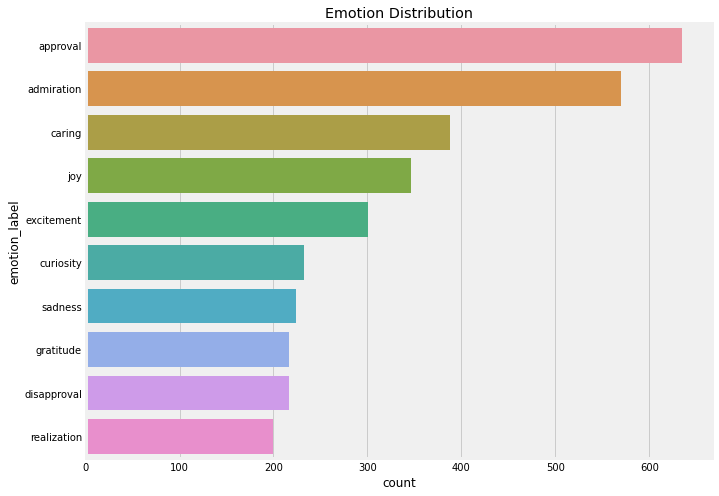

In [ ]:
## Take out dominating neutral and ploting the top 10 emotions
clean_data_neutraless = clean_data[~clean_data['emotion_label'].isin(['neutral'])]

descending_order = clean_data_neutraless['emotion_label'].value_counts().sort_values(ascending=False).index[:10]

plt.figure(figsize=(10,8))
plt.title('Emotion Distribution')
sns.countplot(data=clean_data_neutraless,y='emotion_label',order=descending_order)
plt.show()

The top 5 emotions from the tweet data indicate positive feelings. This alligns with the polarity score analysis.

### 6.2 NRC Lexicon Emotion Analysis

The NRC Emotion Lexicon is a list of English words and their associations with eight basic emotions (anger, fear, anticipation, trust, surprise, sadness, joy, and disgust) and two sentiments (negative and positive). The annotations were manually done by crowdsourcing.

In [ ]:
clean_data['emotions'] = clean_data['cleaned_tweet'].apply(lambda x : NRCLex(x).affect_frequencies)
clean_data_new = clean_data[['cleaned_tweet','emotions']]
clean_data_new.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,cleaned_tweet,emotions
0,Kenyas fuel crisis in pictures FuelShortage ...,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
1,Video of the day FuelShortage,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
2,Pale mesh unaweza promote business yako by s...,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
3,Video of the day FuelShortage,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
4,Who owns RUBiS Energy Just asking as a conce...,"{'fear': 0.25, 'anger': 0.0, 'anticip': 0.0, '..."


In [ ]:
emotions_data = pd.concat([clean_data_new.drop(['emotions'],axis=1),clean_data_new['emotions'].apply(pd.Series)],axis=1)
emotions_data.head()

,cleaned_tweet,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,anticipation
0,Kenyas fuel crisis in pictures FuelShortage ...,0.00,0.0,0.0,0.00,0.0,0.00,1.0,0.00,0.0,0.0,NaN
1,Video of the day FuelShortage,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,NaN
2,Pale mesh unaweza promote business yako by s...,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,NaN
3,Video of the day FuelShortage,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,NaN
4,Who owns RUBiS Energy Just asking as a conce...,0.25,0.0,0.0,0.25,0.0,0.25,0.0,0.25,0.0,0.0,NaN


The table below is a summarization of the lexicon based emotion classes.

In [ ]:
emotions_data.loc[:,'fear':].fillna(0).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fear,13085.0,0.042862,0.103378,0.0,0.0,0.0,0.000000,1.0
anger,13085.0,0.040057,0.104427,0.0,0.0,0.0,0.000000,1.0
anticip,13085.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
trust,13085.0,0.104827,0.204971,0.0,0.0,0.0,0.166667,1.0
surprise,13085.0,0.024070,0.090562,0.0,0.0,0.0,0.000000,1.0
positive,13085.0,0.173341,0.264106,0.0,0.0,0.0,0.250000,1.0
negative,13085.0,0.088746,0.181421,0.0,0.0,0.0,0.142857,1.0
sadness,13085.0,0.032753,0.086675,0.0,0.0,0.0,0.000000,1.0
disgust,13085.0,0.017136,0.064741,0.0,0.0,0.0,0.000000,1.0
joy,13085.0,0.043342,0.097791,0.0,0.0,0.0,0.000000,0.5


Fear, anger and joy appeared in ~ 4% of the tweets. Trust and anticipation appeared in 10% and 8% of the total tweets.

## 7. Conclusions

- Alot of tweets had sentiment analysis scores of neutral. A possible explanation is lamguage barrier. Most probably the transformer and lexicon models had a hard time understanding non-english words.
- The emotinal analysis was successfully done using both the Hugging Face transformer Model and the NRC lexicon model.
- In our case transformers had a wider range of emotions (28 classes) in comparison to lexicon based (8 classes) and may be preferred for futher analysis or model deployment.
- Lexicon based models are super fast in the emotion detection task in comparison to transformers. 
- With more time, it will be interesting to train transformer model on custom data for both the sentiment and emotion analysis.
